In [1]:
import os
os.chdir('../../src')
print(os.listdir())

['configs', 'data', 'models', 'train', 'utils', 'evaluate', 'test', 'desktop.ini']


Device: cuda
set seed to 42

--------------------------------------------------

Training fold 3
Horizon definition:  {'in_freq': 60, 'pct_thresh': 0.1, 'lookahead': 2}


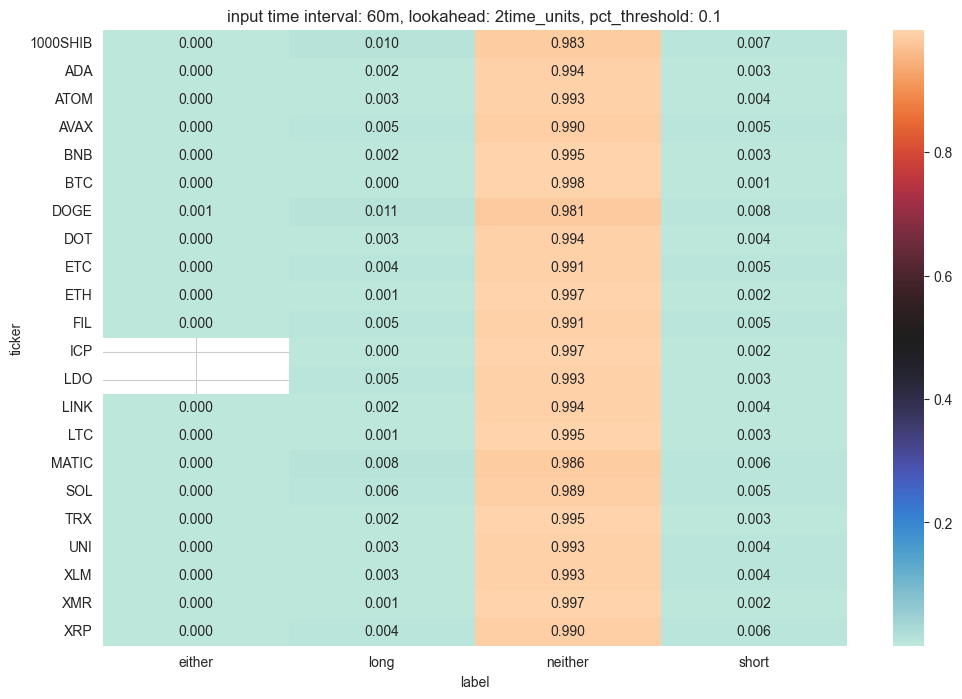

class weights: [0.007649161874543453, 0.9964441212152417, 0.9960724433875136, 0.9998342735227013]
Training with {'train': 4, 'valid': 1, 'test': 4} batches
2020-01-01 00:00:00 2023-10-13 23:00:00
Baseline:
Validation accuracies by labels:  {0: 0.0, 1: 0.0, 2: 0.0, 3: 1.0}

>>> [2024-01-12 12:20:39.852209 | 0/40 | Early stopping counter 1] 
    loss          - train: 1.379811     valid: 1.372823 
    score         - train: 0.000129     valid: 0.000027 
    learning rate        : 1.00000e-04



Epoch 1 | batch 1 / 4: 100%|██████████| 3734/3734 [00:27<00:00, 137.88it/s, batch_loss=3.135903, epoch_loss=0.458833, learning_rate=0.0001]
Epoch 1 | batch 2 / 4: 100%|██████████| 6011/6011 [00:43<00:00, 139.39it/s, batch_loss=0.082947, epoch_loss=0.520939, learning_rate=0.0001]
Epoch 1 | batch 3 / 4: 100%|██████████| 6637/6637 [00:49<00:00, 133.18it/s, batch_loss=1.011022, epoch_loss=0.500793, learning_rate=0.0001]
Epoch 1 | batch 4 / 4: 100%|██████████| 6694/6694 [00:50<00:00, 132.03it/s, batch_loss=0.091139, epoch_loss=0.411845, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.9976, 1: 0.11972, 2: 0.0, 3: 0.0}
>>> [2024-01-12 12:24:28.611849] - Checkpoint and predictions saved

>>> [2024-01-12 12:24:28.611849 | 1/40 | Early stopping counter 0] 
    loss          - train: 0.395556     valid: 0.152102 
    score         - train: 0.342227     valid: 0.270733 
    learning rate        : 1.00000e-04



Epoch 2 | batch 1 / 4: 100%|██████████| 3734/3734 [00:27<00:00, 135.45it/s, batch_loss=1.233594, epoch_loss=0.285736, learning_rate=0.0001]
Epoch 2 | batch 2 / 4: 100%|██████████| 6011/6011 [00:45<00:00, 131.68it/s, batch_loss=0.549805, epoch_loss=0.403912, learning_rate=0.0001]
Epoch 2 | batch 3 / 4: 100%|██████████| 6637/6637 [00:49<00:00, 133.28it/s, batch_loss=0.111745, epoch_loss=0.411066, learning_rate=0.0001]
Epoch 2 | batch 4 / 4: 100%|██████████| 6694/6694 [00:52<00:00, 128.30it/s, batch_loss=0.071097, epoch_loss=0.341452, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.99142, 1: 0.21127, 2: 0.06015, 3: 0.0}
>>> [2024-01-12 12:28:23.200902] - Checkpoint and predictions saved

>>> [2024-01-12 12:28:23.200902 | 2/40 | Early stopping counter 0] 
    loss          - train: 0.329901     valid: 0.141583 
    score         - train: 0.459855     valid: 0.282148 
    learning rate        : 1.00000e-04



Epoch 3 | batch 1 / 4: 100%|██████████| 3734/3734 [00:27<00:00, 135.79it/s, batch_loss=0.082775, epoch_loss=0.245842, learning_rate=0.0001]
Epoch 3 | batch 2 / 4: 100%|██████████| 6011/6011 [00:44<00:00, 135.30it/s, batch_loss=0.183838, epoch_loss=0.368250, learning_rate=0.0001]
Epoch 3 | batch 3 / 4: 100%|██████████| 6637/6637 [00:49<00:00, 132.82it/s, batch_loss=0.082301, epoch_loss=0.372167, learning_rate=0.0001]
Epoch 3 | batch 4 / 4: 100%|██████████| 6694/6694 [00:48<00:00, 136.64it/s, batch_loss=0.006085, epoch_loss=0.306532, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.99805, 1: 0.07746, 2: 0.05263, 3: 0.0}
>>> [2024-01-12 12:32:12.831277] - Checkpoint and predictions saved

>>> [2024-01-12 12:32:12.831277 | 3/40 | Early stopping counter 0] 
    loss          - train: 0.386595     valid: 0.173869 
    score         - train: 0.498644     valid: 0.287052 
    learning rate        : 1.00000e-04



Epoch 4 | batch 1 / 4: 100%|██████████| 3734/3734 [00:28<00:00, 130.48it/s, batch_loss=0.036726, epoch_loss=0.211002, learning_rate=0.0001]
Epoch 4 | batch 2 / 4: 100%|██████████| 6011/6011 [00:44<00:00, 134.29it/s, batch_loss=0.022461, epoch_loss=0.329136, learning_rate=0.0001]
Epoch 4 | batch 3 / 4: 100%|██████████| 6637/6637 [00:48<00:00, 136.95it/s, batch_loss=0.242622, epoch_loss=0.330517, learning_rate=0.0001]
Epoch 4 | batch 4 / 4: 100%|██████████| 6694/6694 [00:50<00:00, 132.72it/s, batch_loss=0.010417, epoch_loss=0.271733, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.99714, 1: 0.11972, 2: 0.02256, 3: 0.0}

>>> [2024-01-12 12:36:00.443986 | 4/40 | Early stopping counter 1] 
    loss          - train: 0.307885     valid: 0.166723 
    score         - train: 0.557381     valid: 0.279717 
    learning rate        : 1.00000e-04



Epoch 5 | batch 1 / 4: 100%|██████████| 3734/3734 [00:26<00:00, 138.87it/s, batch_loss=0.010364, epoch_loss=0.171265, learning_rate=0.0001]
Epoch 5 | batch 2 / 4: 100%|██████████| 6011/6011 [00:43<00:00, 137.76it/s, batch_loss=0.019272, epoch_loss=0.292924, learning_rate=0.0001]
Epoch 5 | batch 3 / 4: 100%|██████████| 6637/6637 [00:49<00:00, 133.82it/s, batch_loss=0.231795, epoch_loss=0.294518, learning_rate=0.0001]
Epoch 5 | batch 4 / 4: 100%|██████████| 6694/6694 [00:55<00:00, 119.74it/s, batch_loss=0.009471, epoch_loss=0.241681, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.99619, 1: 0.12676, 2: 0.01504, 3: 0.0}

>>> [2024-01-12 12:39:53.720143 | 5/40 | Early stopping counter 2] 
    loss          - train: 0.274434     valid: 0.166929 
    score         - train: 0.606612     valid: 0.273152 
    learning rate        : 1.00000e-04



Epoch 6 | batch 1 / 4: 100%|██████████| 3734/3734 [00:27<00:00, 137.29it/s, batch_loss=0.030076, epoch_loss=0.146535, learning_rate=0.0001]
Epoch 6 | batch 2 / 4: 100%|██████████| 6011/6011 [00:42<00:00, 140.12it/s, batch_loss=0.011597, epoch_loss=0.257670, learning_rate=0.0001]
Epoch 6 | batch 3 / 4: 100%|██████████| 6637/6637 [00:48<00:00, 137.38it/s, batch_loss=0.049763, epoch_loss=0.258308, learning_rate=0.0001]
Epoch 6 | batch 4 / 4: 100%|██████████| 6694/6694 [00:49<00:00, 135.06it/s, batch_loss=0.013258, epoch_loss=0.212533, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.99256, 1: 0.19718, 2: 0.01504, 3: 0.0}

>>> [2024-01-12 12:43:37.164861 | 6/40 | Early stopping counter 3] 
    loss          - train: 0.235997     valid: 0.168856 
    score         - train: 0.598079     valid: 0.271085 
    learning rate        : 1.00000e-04



Epoch 7 | batch 1 / 4: 100%|██████████| 3734/3734 [00:32<00:00, 114.99it/s, batch_loss=1.280395, epoch_loss=0.125711, learning_rate=0.0001]
Epoch 7 | batch 2 / 4: 100%|██████████| 6011/6011 [00:43<00:00, 138.30it/s, batch_loss=0.009834, epoch_loss=0.223811, learning_rate=0.0001]
Epoch 7 | batch 3 / 4: 100%|██████████| 6637/6637 [00:48<00:00, 136.70it/s, batch_loss=0.098141, epoch_loss=0.227707, learning_rate=0.0001]
Epoch 7 | batch 4 / 4: 100%|██████████| 6694/6694 [00:50<00:00, 133.75it/s, batch_loss=0.017887, epoch_loss=0.187340, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.99545, 1: 0.16197, 2: 0.00752, 3: 0.0}

>>> [2024-01-12 12:47:28.017351 | 7/40 | Early stopping counter 4] 
    loss          - train: 0.212736     valid: 0.181594 
    score         - train: 0.664734     valid: 0.272453 
    learning rate        : 5.00000e-05



Epoch 8 | batch 1 / 4: 100%|██████████| 3734/3734 [00:27<00:00, 137.88it/s, batch_loss=0.025646, epoch_loss=0.107530, learning_rate=5e-5]
Epoch 8 | batch 2 / 4: 100%|██████████| 6011/6011 [00:42<00:00, 140.06it/s, batch_loss=0.019012, epoch_loss=0.189657, learning_rate=5e-5]
Epoch 8 | batch 3 / 4: 100%|██████████| 6637/6637 [00:48<00:00, 137.29it/s, batch_loss=0.017028, epoch_loss=0.191016, learning_rate=5e-5]
Epoch 8 | batch 4 / 4: 100%|██████████| 6694/6694 [00:53<00:00, 124.11it/s, batch_loss=0.017659, epoch_loss=0.157086, learning_rate=5e-5]


Validation accuracies by labels:  {0: 0.99555, 1: 0.14085, 2: 0.02256, 3: 0.0}

>>> [2024-01-12 12:51:22.948258 | 8/40 | Early stopping counter 5] 
    loss          - train: 0.189358     valid: 0.193162 
    score         - train: 0.708745     valid: 0.276078 
    learning rate        : 5.00000e-05



Epoch 9 | batch 1 / 4: 100%|██████████| 3734/3734 [00:27<00:00, 138.16it/s, batch_loss=0.005053, epoch_loss=0.086995, learning_rate=5e-5]
Epoch 9 | batch 2 / 4: 100%|██████████| 6011/6011 [00:43<00:00, 137.94it/s, batch_loss=0.007454, epoch_loss=0.160544, learning_rate=5e-5]
Epoch 9 | batch 3 / 4: 100%|██████████| 6637/6637 [00:48<00:00, 136.84it/s, batch_loss=0.022925, epoch_loss=0.167826, learning_rate=5e-5]
Epoch 9 | batch 4 / 4: 100%|██████████| 6694/6694 [00:50<00:00, 133.88it/s, batch_loss=0.004977, epoch_loss=0.139622, learning_rate=5e-5]


Validation accuracies by labels:  {0: 0.99699, 1: 0.08451, 2: 0.01504, 3: 0.0}

>>> [2024-01-12 12:55:10.990052 | 9/40 | Early stopping counter 6] 
    loss          - train: 0.166484     valid: 0.200273 
    score         - train: 0.733374     valid: 0.270063 
    learning rate        : 5.00000e-05



Epoch 10 | batch 1 / 4: 100%|██████████| 3734/3734 [00:28<00:00, 131.09it/s, batch_loss=0.002822, epoch_loss=0.078469, learning_rate=5e-5]
Epoch 10 | batch 2 / 4: 100%|██████████| 6011/6011 [00:45<00:00, 132.69it/s, batch_loss=0.006989, epoch_loss=0.144241, learning_rate=5e-5]
Epoch 10 | batch 3 / 4: 100%|██████████| 6637/6637 [00:48<00:00, 136.21it/s, batch_loss=0.271765, epoch_loss=0.150652, learning_rate=5e-5]
Epoch 10 | batch 4 / 4: 100%|██████████| 6694/6694 [00:49<00:00, 135.55it/s, batch_loss=0.006348, epoch_loss=0.126313, learning_rate=5e-5]


Validation accuracies by labels:  {0: 0.99574, 1: 0.09859, 2: 0.00752, 3: 0.0}

>>> [2024-01-12 12:58:57.545791 | 10/40 | Early stopping counter 7] 
    loss          - train: 0.147177     valid: 0.199319 
    score         - train: 0.752499     valid: 0.265615 
    learning rate        : 5.00000e-05



Epoch 11 | batch 1 / 4: 100%|██████████| 3734/3734 [00:26<00:00, 139.53it/s, batch_loss=0.003824, epoch_loss=0.074934, learning_rate=5e-5]
Epoch 11 | batch 2 / 4: 100%|██████████| 6011/6011 [00:43<00:00, 137.84it/s, batch_loss=0.004105, epoch_loss=0.130946, learning_rate=5e-5]
Epoch 11 | batch 3 / 4: 100%|██████████| 6637/6637 [00:48<00:00, 135.72it/s, batch_loss=0.558564, epoch_loss=0.137607, learning_rate=5e-5]
Epoch 11 | batch 4 / 4: 100%|██████████| 6694/6694 [00:53<00:00, 126.10it/s, batch_loss=0.052068, epoch_loss=0.115862, learning_rate=5e-5]


Validation accuracies by labels:  {0: 0.99328, 1: 0.11268, 2: 0.01504, 3: 0.0}

>>> [2024-01-12 13:02:42.603034 | 11/40 | Early stopping counter 8] 
    loss          - train: 0.139131     valid: 0.204315 
    score         - train: 0.724565     valid: 0.264792 
    learning rate        : 2.50000e-05



Epoch 12 | batch 1 / 4: 100%|██████████| 3734/3734 [00:26<00:00, 138.94it/s, batch_loss=0.007514, epoch_loss=0.066266, learning_rate=2.5e-5]
Epoch 12 | batch 2 / 4: 100%|██████████| 6011/6011 [00:43<00:00, 136.78it/s, batch_loss=0.004768, epoch_loss=0.113006, learning_rate=2.5e-5]
Epoch 12 | batch 3 / 4: 100%|██████████| 6637/6637 [00:50<00:00, 130.50it/s, batch_loss=0.017658, epoch_loss=0.119241, learning_rate=2.5e-5]
Epoch 12 | batch 4 / 4: 100%|██████████| 6694/6694 [00:50<00:00, 131.68it/s, batch_loss=0.006122, epoch_loss=0.100549, learning_rate=2.5e-5]


Validation accuracies by labels:  {0: 0.99688, 1: 0.06338, 2: 0.0, 3: 0.0}

>>> [2024-01-12 13:06:29.644733 | 12/40 | Early stopping counter 9] 
    loss          - train: 0.128478     valid: 0.218878 
    score         - train: 0.788648     valid: 0.260309 
    learning rate        : 2.50000e-05



Epoch 13 | batch 1 / 4: 100%|██████████| 3734/3734 [00:26<00:00, 139.75it/s, batch_loss=0.003639, epoch_loss=0.057133, learning_rate=2.5e-5]
Epoch 13 | batch 2 / 4: 100%|██████████| 6011/6011 [00:43<00:00, 138.83it/s, batch_loss=0.007904, epoch_loss=0.101819, learning_rate=2.5e-5]
Epoch 13 | batch 3 / 4: 100%|██████████| 6637/6637 [00:51<00:00, 129.87it/s, batch_loss=0.036681, epoch_loss=0.109161, learning_rate=2.5e-5]
Epoch 13 | batch 4 / 4: 100%|██████████| 6694/6694 [00:50<00:00, 132.92it/s, batch_loss=0.005590, epoch_loss=0.093044, learning_rate=2.5e-5]


Validation accuracies by labels:  {0: 0.99477, 1: 0.06338, 2: 0.03759, 3: 0.0}

>>> [2024-01-12 13:10:17.875211 | 13/40 | Early stopping counter 10] 
    loss          - train: 0.104694     valid: 0.213742 
    score         - train: 0.779958     valid: 0.267250 
    learning rate        : 2.50000e-05

set seed to 42

--------------------------------------------------

Training fold 3
Horizon definition:  {'in_freq': 60, 'pct_thresh': 0.05, 'lookahead': 6}


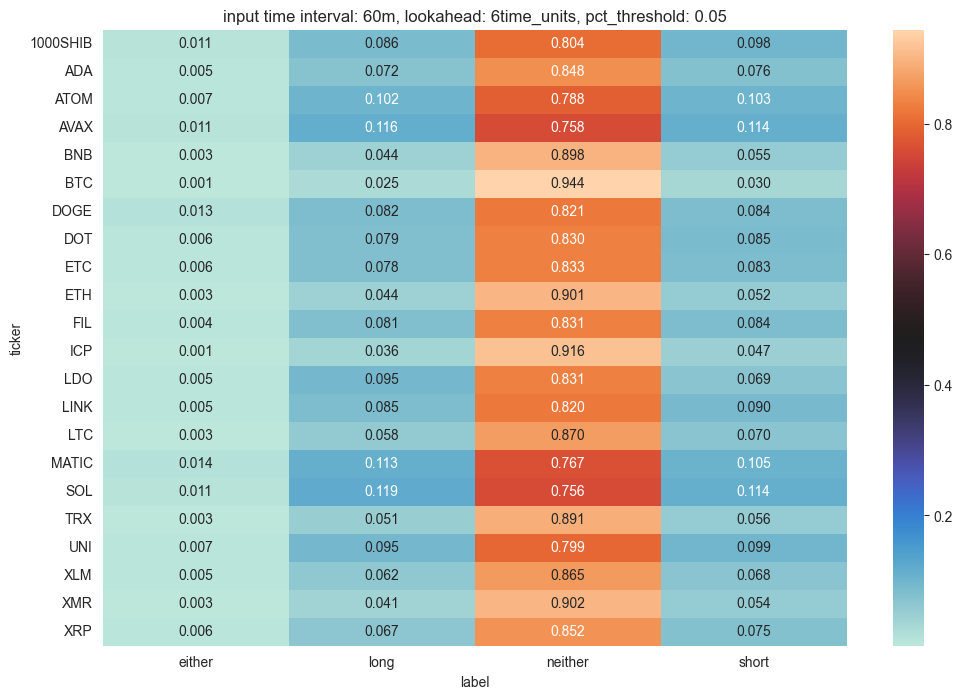

class weights: [0.15649406441772085, 0.9270385161205201, 0.9224609255582408, 0.9940064939035183]
Training with {'train': 4, 'valid': 1, 'test': 4} batches
2020-01-01 00:00:00 2023-10-13 23:00:00
Baseline:
Validation accuracies by labels:  {0: 0.0, 1: 0.0, 2: 0.0, 3: 1.0}

>>> [2024-01-12 13:14:47.193763 | 0/40 | Early stopping counter 0] 
    loss          - train: 1.405295     valid: 1.385789 
    score         - train: 0.004499     valid: 0.001106 
    learning rate        : 1.00000e-04



Epoch 1 | batch 1 / 4: 100%|██████████| 3734/3734 [00:26<00:00, 142.06it/s, batch_loss=2.171286, epoch_loss=1.015897, learning_rate=0.0001]
Epoch 1 | batch 2 / 4: 100%|██████████| 6011/6011 [00:42<00:00, 140.51it/s, batch_loss=1.453125, epoch_loss=1.069306, learning_rate=0.0001]
Epoch 1 | batch 3 / 4: 100%|██████████| 6637/6637 [00:49<00:00, 132.76it/s, batch_loss=1.327561, epoch_loss=1.077761, learning_rate=0.0001]
Epoch 1 | batch 4 / 4: 100%|██████████| 6694/6694 [00:49<00:00, 133.98it/s, batch_loss=1.099433, epoch_loss=1.051247, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.93853, 1: 0.12671, 2: 0.1601, 3: 0.0396}
>>> [2024-01-12 13:18:31.505664] - Checkpoint and predictions saved

>>> [2024-01-12 13:18:31.505664 | 1/40 | Early stopping counter 0] 
    loss          - train: 1.030054     valid: 0.725666 
    score         - train: 0.371899     valid: 0.326517 
    learning rate        : 1.00000e-04



Epoch 2 | batch 1 / 4: 100%|██████████| 3734/3734 [00:26<00:00, 142.04it/s, batch_loss=0.603364, epoch_loss=0.886622, learning_rate=0.0001]
Epoch 2 | batch 2 / 4: 100%|██████████| 6011/6011 [00:42<00:00, 140.06it/s, batch_loss=0.774414, epoch_loss=0.985459, learning_rate=0.0001]
Epoch 2 | batch 3 / 4: 100%|██████████| 6637/6637 [00:52<00:00, 125.28it/s, batch_loss=0.807319, epoch_loss=1.013096, learning_rate=0.0001]
Epoch 2 | batch 4 / 4: 100%|██████████| 6694/6694 [00:49<00:00, 134.00it/s, batch_loss=0.830853, epoch_loss=0.995369, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.91469, 1: 0.17105, 2: 0.19803, 3: 0.10396}
>>> [2024-01-12 13:22:20.807179] - Checkpoint and predictions saved

>>> [2024-01-12 13:22:20.807179 | 2/40 | Early stopping counter 0] 
    loss          - train: 0.984458     valid: 0.729413 
    score         - train: 0.426127     valid: 0.354359 
    learning rate        : 1.00000e-04



Epoch 3 | batch 1 / 4: 100%|██████████| 3734/3734 [00:26<00:00, 140.28it/s, batch_loss=0.899945, epoch_loss=0.845702, learning_rate=0.0001]
Epoch 3 | batch 2 / 4: 100%|██████████| 6011/6011 [00:43<00:00, 137.45it/s, batch_loss=0.785645, epoch_loss=0.957692, learning_rate=0.0001]
Epoch 3 | batch 3 / 4: 100%|██████████| 6637/6637 [00:48<00:00, 135.65it/s, batch_loss=0.966044, epoch_loss=0.984690, learning_rate=0.0001]
Epoch 3 | batch 4 / 4: 100%|██████████| 6694/6694 [00:49<00:00, 133.95it/s, batch_loss=0.705631, epoch_loss=0.964589, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.94057, 1: 0.18811, 2: 0.11256, 3: 0.08416}

>>> [2024-01-12 13:26:07.170812 | 3/40 | Early stopping counter 1] 
    loss          - train: 0.962924     valid: 0.699445 
    score         - train: 0.468847     valid: 0.345214 
    learning rate        : 1.00000e-04



Epoch 4 | batch 1 / 4: 100%|██████████| 3734/3734 [00:29<00:00, 128.02it/s, batch_loss=0.921188, epoch_loss=0.814617, learning_rate=0.0001]
Epoch 4 | batch 2 / 4: 100%|██████████| 6011/6011 [00:44<00:00, 136.00it/s, batch_loss=2.205078, epoch_loss=0.935661, learning_rate=0.0001]
Epoch 4 | batch 3 / 4: 100%|██████████| 6637/6637 [00:48<00:00, 136.45it/s, batch_loss=0.680188, epoch_loss=0.955029, learning_rate=0.0001]
Epoch 4 | batch 4 / 4: 100%|██████████| 6694/6694 [00:51<00:00, 131.12it/s, batch_loss=0.598146, epoch_loss=0.928947, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.94137, 1: 0.12744, 2: 0.15025, 3: 0.07426}

>>> [2024-01-12 13:29:57.302005 | 4/40 | Early stopping counter 2] 
    loss          - train: 0.939787     valid: 0.698335 
    score         - train: 0.490757     valid: 0.337660 
    learning rate        : 1.00000e-04



Epoch 5 | batch 1 / 4: 100%|██████████| 3734/3734 [00:26<00:00, 142.48it/s, batch_loss=0.937037, epoch_loss=0.781580, learning_rate=0.0001]
Epoch 5 | batch 2 / 4: 100%|██████████| 6011/6011 [00:43<00:00, 139.28it/s, batch_loss=0.273926, epoch_loss=0.912185, learning_rate=0.0001]
Epoch 5 | batch 3 / 4: 100%|██████████| 6637/6637 [00:51<00:00, 127.77it/s, batch_loss=1.003372, epoch_loss=0.924909, learning_rate=0.0001]
Epoch 5 | batch 4 / 4: 100%|██████████| 6694/6694 [00:51<00:00, 128.96it/s, batch_loss=1.178612, epoch_loss=0.894563, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.93518, 1: 0.11891, 2: 0.16429, 3: 0.07921}

>>> [2024-01-12 13:33:48.882115 | 5/40 | Early stopping counter 3] 
    loss          - train: 0.907092     valid: 0.709327 
    score         - train: 0.513288     valid: 0.334015 
    learning rate        : 1.00000e-04



Epoch 6 | batch 1 / 4: 100%|██████████| 3734/3734 [00:27<00:00, 135.45it/s, batch_loss=1.400523, epoch_loss=0.749771, learning_rate=0.0001]
Epoch 6 | batch 2 / 4: 100%|██████████| 6011/6011 [00:44<00:00, 135.70it/s, batch_loss=0.399170, epoch_loss=0.890389, learning_rate=0.0001]
Epoch 6 | batch 3 / 4: 100%|██████████| 6637/6637 [00:48<00:00, 136.86it/s, batch_loss=1.304787, epoch_loss=0.897321, learning_rate=0.0001]
Epoch 6 | batch 4 / 4: 100%|██████████| 6694/6694 [00:50<00:00, 133.60it/s, batch_loss=1.392838, epoch_loss=0.865338, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.92108, 1: 0.13938, 2: 0.16158, 3: 0.06931}

>>> [2024-01-12 13:37:35.910986 | 6/40 | Early stopping counter 4] 
    loss          - train: 0.878505     valid: 0.728495 
    score         - train: 0.532729     valid: 0.329331 
    learning rate        : 5.00000e-05



Epoch 7 | batch 1 / 4: 100%|██████████| 3734/3734 [00:32<00:00, 114.93it/s, batch_loss=0.721598, epoch_loss=0.731664, learning_rate=5e-5]
Epoch 7 | batch 2 / 4: 100%|██████████| 6011/6011 [00:44<00:00, 136.20it/s, batch_loss=0.317627, epoch_loss=0.874281, learning_rate=5e-5]
Epoch 7 | batch 3 / 4: 100%|██████████| 6637/6637 [00:48<00:00, 136.34it/s, batch_loss=0.928996, epoch_loss=0.875036, learning_rate=5e-5]
Epoch 7 | batch 4 / 4: 100%|██████████| 6694/6694 [00:50<00:00, 133.79it/s, batch_loss=1.511228, epoch_loss=0.836369, learning_rate=5e-5]


Validation accuracies by labels:  {0: 0.92015, 1: 0.1462, 2: 0.14877, 3: 0.08911}

>>> [2024-01-12 13:41:27.860104 | 7/40 | Early stopping counter 5] 
    loss          - train: 0.859801     valid: 0.739065 
    score         - train: 0.551818     valid: 0.331102 
    learning rate        : 5.00000e-05



Epoch 8 | batch 1 / 4: 100%|██████████| 3734/3734 [00:26<00:00, 139.21it/s, batch_loss=0.448949, epoch_loss=0.712494, learning_rate=5e-5]
Epoch 8 | batch 2 / 4: 100%|██████████| 6011/6011 [00:43<00:00, 139.41it/s, batch_loss=0.265381, epoch_loss=0.859242, learning_rate=5e-5]
Epoch 8 | batch 3 / 4: 100%|██████████| 6637/6637 [00:48<00:00, 136.49it/s, batch_loss=0.392425, epoch_loss=0.859313, learning_rate=5e-5]
Epoch 8 | batch 4 / 4: 100%|██████████| 6694/6694 [00:50<00:00, 133.21it/s, batch_loss=0.731156, epoch_loss=0.821792, learning_rate=5e-5]


Validation accuracies by labels:  {0: 0.9027, 1: 0.13012, 2: 0.17931, 3: 0.08416}

>>> [2024-01-12 13:45:17.397207 | 8/40 | Early stopping counter 6] 
    loss          - train: 0.853757     valid: 0.760861 
    score         - train: 0.547909     valid: 0.326554 
    learning rate        : 5.00000e-05



Epoch 9 | batch 1 / 4: 100%|██████████| 3734/3734 [00:27<00:00, 136.48it/s, batch_loss=0.715834, epoch_loss=0.695569, learning_rate=5e-5]
Epoch 9 | batch 2 / 4: 100%|██████████| 6011/6011 [00:44<00:00, 136.20it/s, batch_loss=0.103333, epoch_loss=0.845974, learning_rate=5e-5]
Epoch 9 | batch 3 / 4: 100%|██████████| 6637/6637 [00:48<00:00, 136.86it/s, batch_loss=1.219229, epoch_loss=0.845603, learning_rate=5e-5]
Epoch 9 | batch 4 / 4: 100%|██████████| 6694/6694 [00:50<00:00, 133.08it/s, batch_loss=1.513642, epoch_loss=0.808443, learning_rate=5e-5]


Validation accuracies by labels:  {0: 0.90168, 1: 0.12914, 2: 0.17365, 3: 0.07426}

>>> [2024-01-12 13:49:09.362671 | 9/40 | Early stopping counter 7] 
    loss          - train: 0.835293     valid: 0.767267 
    score         - train: 0.560433     valid: 0.322971 
    learning rate        : 5.00000e-05



Epoch 10 | batch 1 / 4: 100%|██████████| 3734/3734 [00:26<00:00, 142.10it/s, batch_loss=1.369320, epoch_loss=0.682173, learning_rate=5e-5]
Epoch 10 | batch 2 / 4: 100%|██████████| 6011/6011 [00:49<00:00, 121.60it/s, batch_loss=0.381836, epoch_loss=0.836102, learning_rate=5e-5]
Epoch 10 | batch 3 / 4: 100%|██████████| 6637/6637 [00:50<00:00, 132.56it/s, batch_loss=0.352653, epoch_loss=0.834375, learning_rate=5e-5]
Epoch 10 | batch 4 / 4: 100%|██████████| 6694/6694 [00:50<00:00, 132.91it/s, batch_loss=0.289070, epoch_loss=0.796820, learning_rate=5e-5]


Validation accuracies by labels:  {0: 0.92916, 1: 0.13475, 2: 0.13103, 3: 0.07921}

>>> [2024-01-12 13:53:00.621239 | 10/40 | Early stopping counter 8] 
    loss          - train: 0.825855     valid: 0.755160 
    score         - train: 0.574229     valid: 0.327018 
    learning rate        : 2.50000e-05



Epoch 11 | batch 1 / 4: 100%|██████████| 3734/3734 [00:25<00:00, 143.62it/s, batch_loss=0.228723, epoch_loss=0.672842, learning_rate=2.5e-5]
Epoch 11 | batch 2 / 4: 100%|██████████| 6011/6011 [00:43<00:00, 137.31it/s, batch_loss=0.130127, epoch_loss=0.827317, learning_rate=2.5e-5]
Epoch 11 | batch 3 / 4: 100%|██████████| 6637/6637 [00:48<00:00, 136.93it/s, batch_loss=0.658899, epoch_loss=0.823586, learning_rate=2.5e-5]
Epoch 11 | batch 4 / 4: 100%|██████████| 6694/6694 [00:50<00:00, 133.65it/s, batch_loss=1.029753, epoch_loss=0.782613, learning_rate=2.5e-5]


Validation accuracies by labels:  {0: 0.90127, 1: 0.14937, 2: 0.16527, 3: 0.07426}

>>> [2024-01-12 13:56:44.061682 | 11/40 | Early stopping counter 9] 
    loss          - train: 0.814827     valid: 0.778855 
    score         - train: 0.572158     valid: 0.325431 
    learning rate        : 2.50000e-05



Epoch 12 | batch 1 / 4: 100%|██████████| 3734/3734 [00:27<00:00, 133.83it/s, batch_loss=0.337825, epoch_loss=0.661538, learning_rate=2.5e-5]
Epoch 12 | batch 2 / 4: 100%|██████████| 6011/6011 [00:44<00:00, 134.37it/s, batch_loss=1.664062, epoch_loss=0.819521, learning_rate=2.5e-5]
Epoch 12 | batch 3 / 4: 100%|██████████| 6637/6637 [00:49<00:00, 132.92it/s, batch_loss=0.639915, epoch_loss=0.815757, learning_rate=2.5e-5]
Epoch 12 | batch 4 / 4: 100%|██████████| 6694/6694 [00:50<00:00, 133.41it/s, batch_loss=0.289824, epoch_loss=0.775418, learning_rate=2.5e-5]


Validation accuracies by labels:  {0: 0.89793, 1: 0.1652, 2: 0.15862, 3: 0.08911}

>>> [2024-01-12 14:00:34.027449 | 12/40 | Early stopping counter 10] 
    loss          - train: 0.802300     valid: 0.776309 
    score         - train: 0.577941     valid: 0.327613 
    learning rate        : 2.50000e-05

set seed to 42

--------------------------------------------------

Training fold 3
Horizon definition:  {'in_freq': 60, 'pct_thresh': 0.05, 'lookahead': 4}


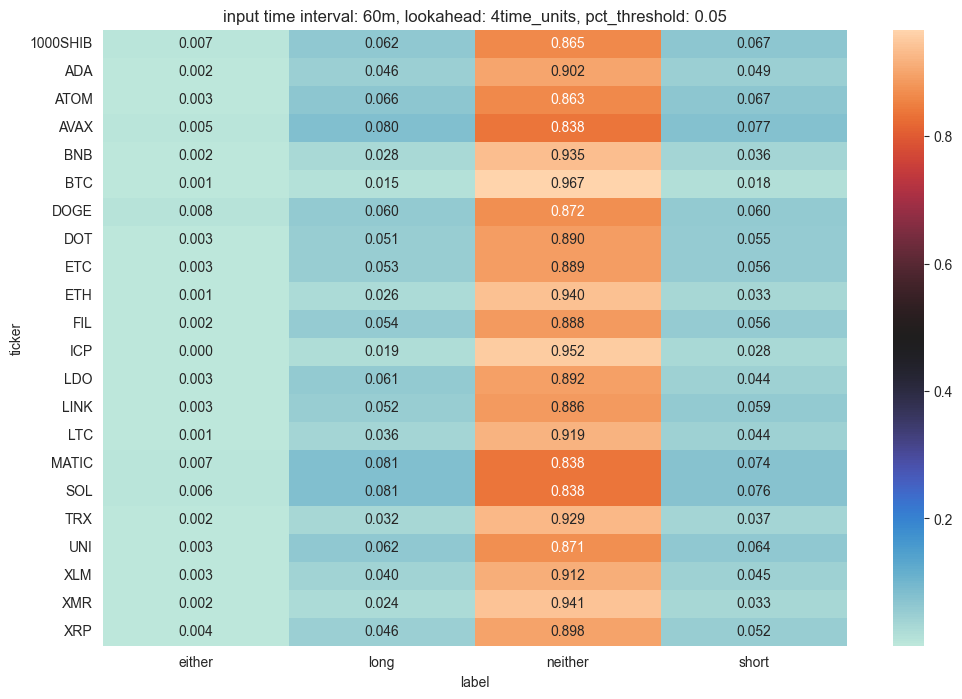

class weights: [0.10249941271685226, 0.9518830067609967, 0.9487679925857514, 0.9968495879363997]
Training with {'train': 4, 'valid': 1, 'test': 4} batches
2020-01-01 00:00:00 2023-10-13 23:00:00
Baseline:
Validation accuracies by labels:  {0: 0.0, 1: 0.0, 2: 0.0, 3: 1.0}

>>> [2024-01-12 14:05:18.085265 | 0/40 | Early stopping counter 1] 
    loss          - train: 1.403512     valid: 1.383234 
    score         - train: 0.002384     valid: 0.000543 
    learning rate        : 1.00000e-04



Epoch 1 | batch 1 / 4: 100%|██████████| 3734/3734 [00:26<00:00, 138.31it/s, batch_loss=2.448517, epoch_loss=0.967191, learning_rate=0.0001]
Epoch 1 | batch 2 / 4: 100%|██████████| 6011/6011 [00:43<00:00, 138.85it/s, batch_loss=1.284180, epoch_loss=1.029797, learning_rate=0.0001]
Epoch 1 | batch 3 / 4: 100%|██████████| 6637/6637 [00:48<00:00, 135.57it/s, batch_loss=1.369379, epoch_loss=1.035180, learning_rate=0.0001]
Epoch 1 | batch 4 / 4: 100%|██████████| 6694/6694 [00:59<00:00, 111.93it/s, batch_loss=1.096395, epoch_loss=0.998559, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.94789, 1: 0.20397, 2: 0.09361, 3: 0.0101}
>>> [2024-01-12 14:09:15.844042] - Checkpoint and predictions saved

>>> [2024-01-12 14:09:15.844042 | 1/40 | Early stopping counter 0] 
    loss          - train: 0.977157     valid: 0.634577 
    score         - train: 0.369461     valid: 0.307981 
    learning rate        : 1.00000e-04



Epoch 2 | batch 1 / 4: 100%|██████████| 3734/3734 [00:26<00:00, 141.33it/s, batch_loss=0.568012, epoch_loss=0.827968, learning_rate=0.0001]
Epoch 2 | batch 2 / 4: 100%|██████████| 6011/6011 [00:44<00:00, 136.17it/s, batch_loss=0.771973, epoch_loss=0.938688, learning_rate=0.0001]
Epoch 2 | batch 3 / 4: 100%|██████████| 6637/6637 [00:50<00:00, 132.25it/s, batch_loss=0.975110, epoch_loss=0.964214, learning_rate=0.0001]
Epoch 2 | batch 4 / 4: 100%|██████████| 6694/6694 [00:50<00:00, 133.16it/s, batch_loss=0.910372, epoch_loss=0.935571, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.9323, 1: 0.18856, 2: 0.19134, 3: 0.11111}
>>> [2024-01-12 14:13:03.209130] - Checkpoint and predictions saved

>>> [2024-01-12 14:13:03.209130 | 2/40 | Early stopping counter 0] 
    loss          - train: 0.921522     valid: 0.623249 
    score         - train: 0.426897     valid: 0.357641 
    learning rate        : 1.00000e-04



Epoch 3 | batch 1 / 4: 100%|██████████| 3734/3734 [00:26<00:00, 141.41it/s, batch_loss=0.283931, epoch_loss=0.779976, learning_rate=0.0001]
Epoch 3 | batch 2 / 4: 100%|██████████| 6011/6011 [00:44<00:00, 134.25it/s, batch_loss=0.746582, epoch_loss=0.904918, learning_rate=0.0001]
Epoch 3 | batch 3 / 4: 100%|██████████| 6637/6637 [00:49<00:00, 133.36it/s, batch_loss=0.813208, epoch_loss=0.929067, learning_rate=0.0001]
Epoch 3 | batch 4 / 4: 100%|██████████| 6694/6694 [00:50<00:00, 132.89it/s, batch_loss=0.754475, epoch_loss=0.896012, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.94688, 1: 0.21168, 2: 0.10557, 3: 0.10101}

>>> [2024-01-12 14:16:53.019903 | 3/40 | Early stopping counter 1] 
    loss          - train: 0.899236     valid: 0.602939 
    score         - train: 0.470517     valid: 0.349350 
    learning rate        : 1.00000e-04



Epoch 4 | batch 1 / 4: 100%|██████████| 3734/3734 [00:27<00:00, 137.77it/s, batch_loss=1.125550, epoch_loss=0.742786, learning_rate=0.0001]
Epoch 4 | batch 2 / 4: 100%|██████████| 6011/6011 [00:43<00:00, 139.13it/s, batch_loss=0.237427, epoch_loss=0.878281, learning_rate=0.0001]
Epoch 4 | batch 3 / 4: 100%|██████████| 6637/6637 [00:48<00:00, 136.54it/s, batch_loss=0.350099, epoch_loss=0.891752, learning_rate=0.0001]
Epoch 4 | batch 4 / 4: 100%|██████████| 6694/6694 [00:51<00:00, 130.32it/s, batch_loss=0.370336, epoch_loss=0.853587, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.94731, 1: 0.16707, 2: 0.15175, 3: 0.10101}

>>> [2024-01-12 14:20:41.116919 | 4/40 | Early stopping counter 2] 
    loss          - train: 0.860585     valid: 0.613584 
    score         - train: 0.488833     valid: 0.353339 
    learning rate        : 1.00000e-04



Epoch 5 | batch 1 / 4: 100%|██████████| 3734/3734 [00:27<00:00, 137.75it/s, batch_loss=1.064342, epoch_loss=0.711118, learning_rate=0.0001]
Epoch 5 | batch 2 / 4: 100%|██████████| 6011/6011 [00:44<00:00, 135.21it/s, batch_loss=0.291504, epoch_loss=0.854442, learning_rate=0.0001]
Epoch 5 | batch 3 / 4: 100%|██████████| 6637/6637 [00:50<00:00, 132.29it/s, batch_loss=0.812185, epoch_loss=0.860502, learning_rate=0.0001]
Epoch 5 | batch 4 / 4: 100%|██████████| 6694/6694 [00:51<00:00, 130.16it/s, batch_loss=1.011704, epoch_loss=0.819377, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.93813, 1: 0.16221, 2: 0.17113, 3: 0.10101}

>>> [2024-01-12 14:24:31.545004 | 5/40 | Early stopping counter 3] 
    loss          - train: 0.826381     valid: 0.625344 
    score         - train: 0.509996     valid: 0.345044 
    learning rate        : 1.00000e-04



Epoch 6 | batch 1 / 4: 100%|██████████| 3734/3734 [00:26<00:00, 141.17it/s, batch_loss=1.625258, epoch_loss=0.677529, learning_rate=0.0001]
Epoch 6 | batch 2 / 4: 100%|██████████| 6011/6011 [00:44<00:00, 135.16it/s, batch_loss=0.455322, epoch_loss=0.827216, learning_rate=0.0001]
Epoch 6 | batch 3 / 4: 100%|██████████| 6637/6637 [00:49<00:00, 134.72it/s, batch_loss=0.897580, epoch_loss=0.828379, learning_rate=0.0001]
Epoch 6 | batch 4 / 4: 100%|██████████| 6694/6694 [00:51<00:00, 128.98it/s, batch_loss=0.239039, epoch_loss=0.787319, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.95907, 1: 0.15207, 2: 0.10186, 3: 0.08081}

>>> [2024-01-12 14:28:21.644162 | 6/40 | Early stopping counter 4] 
    loss          - train: 0.824892     valid: 0.638471 
    score         - train: 0.544008     valid: 0.336348 
    learning rate        : 5.00000e-05



Epoch 7 | batch 1 / 4: 100%|██████████| 3734/3734 [00:26<00:00, 141.54it/s, batch_loss=0.832054, epoch_loss=0.658662, learning_rate=5e-5]
Epoch 7 | batch 2 / 4: 100%|██████████| 6011/6011 [00:43<00:00, 138.45it/s, batch_loss=0.269043, epoch_loss=0.807028, learning_rate=5e-5]
Epoch 7 | batch 3 / 4: 100%|██████████| 6637/6637 [00:47<00:00, 138.78it/s, batch_loss=0.784889, epoch_loss=0.801305, learning_rate=5e-5]
Epoch 7 | batch 4 / 4: 100%|██████████| 6694/6694 [00:49<00:00, 135.93it/s, batch_loss=0.755916, epoch_loss=0.754196, learning_rate=5e-5]


Validation accuracies by labels:  {0: 0.95056, 1: 0.16586, 2: 0.11753, 3: 0.11111}

>>> [2024-01-12 14:32:08.991810 | 7/40 | Early stopping counter 5] 
    loss          - train: 0.782911     valid: 0.640893 
    score         - train: 0.565060     valid: 0.340973 
    learning rate        : 5.00000e-05



Epoch 8 | batch 1 / 4: 100%|██████████| 3734/3734 [00:27<00:00, 137.56it/s, batch_loss=0.568046, epoch_loss=0.640687, learning_rate=5e-5]
Epoch 8 | batch 2 / 4: 100%|██████████| 6011/6011 [00:43<00:00, 137.38it/s, batch_loss=0.405273, epoch_loss=0.791700, learning_rate=5e-5]
Epoch 8 | batch 3 / 4: 100%|██████████| 6637/6637 [00:49<00:00, 134.13it/s, batch_loss=0.643787, epoch_loss=0.784139, learning_rate=5e-5]
Epoch 8 | batch 4 / 4: 100%|██████████| 6694/6694 [00:50<00:00, 132.29it/s, batch_loss=0.269157, epoch_loss=0.738814, learning_rate=5e-5]


Validation accuracies by labels:  {0: 0.93078, 1: 0.17762, 2: 0.14557, 3: 0.11111}

>>> [2024-01-12 14:35:57.390655 | 8/40 | Early stopping counter 6] 
    loss          - train: 0.763818     valid: 0.654245 
    score         - train: 0.553213     valid: 0.332556 
    learning rate        : 5.00000e-05



Epoch 9 | batch 1 / 4: 100%|██████████| 3734/3734 [00:26<00:00, 142.78it/s, batch_loss=0.164082, epoch_loss=0.622725, learning_rate=5e-5]
Epoch 9 | batch 2 / 4: 100%|██████████| 6011/6011 [00:43<00:00, 138.95it/s, batch_loss=0.085510, epoch_loss=0.776276, learning_rate=5e-5]
Epoch 9 | batch 3 / 4: 100%|██████████| 6637/6637 [00:48<00:00, 137.79it/s, batch_loss=1.279581, epoch_loss=0.768840, learning_rate=5e-5]
Epoch 9 | batch 4 / 4: 100%|██████████| 6694/6694 [00:51<00:00, 130.40it/s, batch_loss=1.242750, epoch_loss=0.724124, learning_rate=5e-5]


Validation accuracies by labels:  {0: 0.93239, 1: 0.1618, 2: 0.15794, 3: 0.10101}

>>> [2024-01-12 14:39:44.980558 | 9/40 | Early stopping counter 7] 
    loss          - train: 0.746449     valid: 0.662180 
    score         - train: 0.575409     valid: 0.332699 
    learning rate        : 5.00000e-05



Epoch 10 | batch 1 / 4: 100%|██████████| 3734/3734 [00:26<00:00, 140.22it/s, batch_loss=1.240066, epoch_loss=0.604626, learning_rate=5e-5]
Epoch 10 | batch 2 / 4: 100%|██████████| 6011/6011 [00:43<00:00, 138.70it/s, batch_loss=0.159058, epoch_loss=0.762856, learning_rate=5e-5]
Epoch 10 | batch 3 / 4: 100%|██████████| 6637/6637 [00:49<00:00, 135.36it/s, batch_loss=0.211013, epoch_loss=0.755172, learning_rate=5e-5]
Epoch 10 | batch 4 / 4: 100%|██████████| 6694/6694 [00:50<00:00, 132.86it/s, batch_loss=0.157837, epoch_loss=0.710960, learning_rate=5e-5]


Validation accuracies by labels:  {0: 0.94254, 1: 0.1691, 2: 0.12866, 3: 0.11111}

>>> [2024-01-12 14:43:35.472380 | 10/40 | Early stopping counter 8] 
    loss          - train: 0.740394     valid: 0.663682 
    score         - train: 0.582563     valid: 0.336496 
    learning rate        : 2.50000e-05



Epoch 11 | batch 1 / 4: 100%|██████████| 3734/3734 [00:27<00:00, 136.24it/s, batch_loss=1.584050, epoch_loss=0.589584, learning_rate=2.5e-5]
Epoch 11 | batch 2 / 4: 100%|██████████| 6011/6011 [00:47<00:00, 127.17it/s, batch_loss=0.124817, epoch_loss=0.750057, learning_rate=2.5e-5]
Epoch 11 | batch 3 / 4: 100%|██████████| 6637/6637 [00:48<00:00, 136.66it/s, batch_loss=0.944831, epoch_loss=0.741102, learning_rate=2.5e-5]
Epoch 11 | batch 4 / 4: 100%|██████████| 6694/6694 [00:50<00:00, 131.64it/s, batch_loss=2.117104, epoch_loss=0.693525, learning_rate=2.5e-5]


Validation accuracies by labels:  {0: 0.94133, 1: 0.16788, 2: 0.12412, 3: 0.09091}

>>> [2024-01-12 14:47:30.264913 | 11/40 | Early stopping counter 9] 
    loss          - train: 0.720280     valid: 0.666337 
    score         - train: 0.596182     valid: 0.330817 
    learning rate        : 2.50000e-05



Epoch 12 | batch 1 / 4: 100%|██████████| 3734/3734 [00:27<00:00, 137.95it/s, batch_loss=0.307767, epoch_loss=0.578108, learning_rate=2.5e-5]
Epoch 12 | batch 2 / 4: 100%|██████████| 6011/6011 [00:42<00:00, 140.30it/s, batch_loss=1.201172, epoch_loss=0.740812, learning_rate=2.5e-5]
Epoch 12 | batch 3 / 4: 100%|██████████| 6637/6637 [00:48<00:00, 136.58it/s, batch_loss=0.586995, epoch_loss=0.731390, learning_rate=2.5e-5]
Epoch 12 | batch 4 / 4: 100%|██████████| 6694/6694 [00:52<00:00, 128.27it/s, batch_loss=0.279999, epoch_loss=0.685202, learning_rate=2.5e-5]


Validation accuracies by labels:  {0: 0.93166, 1: 0.17559, 2: 0.13567, 3: 0.11111}

>>> [2024-01-12 14:51:22.130081 | 12/40 | Early stopping counter 10] 
    loss          - train: 0.713581     valid: 0.672969 
    score         - train: 0.588446     valid: 0.330829 
    learning rate        : 2.50000e-05

set seed to 42

--------------------------------------------------

Training fold 3
Horizon definition:  {'in_freq': 60, 'pct_thresh': 0.05, 'lookahead': 2}


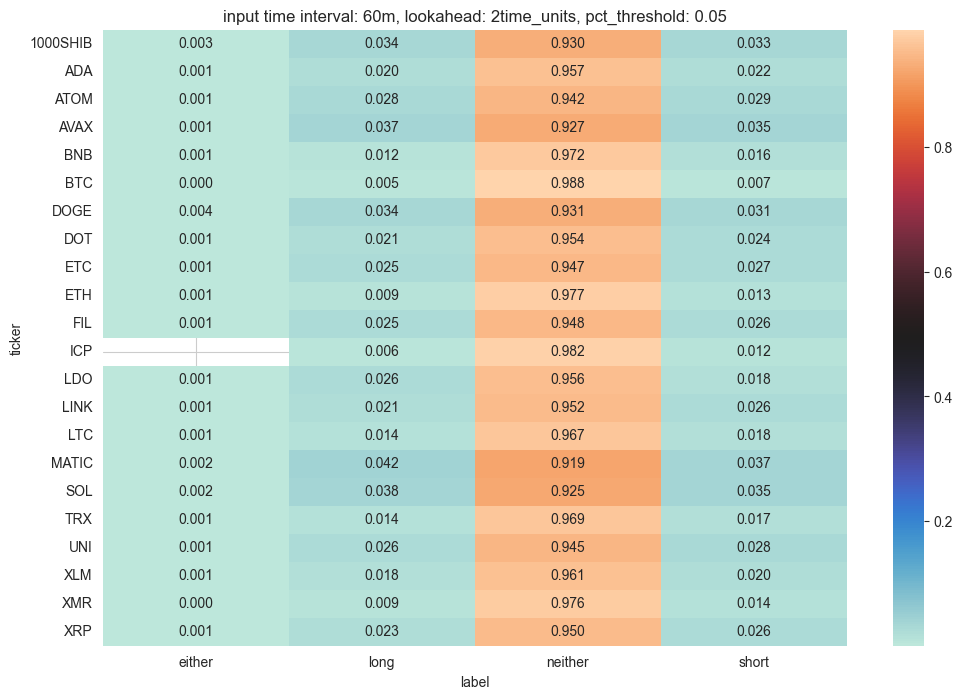

class weights: [0.046223206212007595, 0.978236734641339, 0.9766824455435668, 0.9988576136030867]
Training with {'train': 4, 'valid': 1, 'test': 4} batches
2020-01-01 00:00:00 2023-10-13 23:00:00
Baseline:
Validation accuracies by labels:  {0: 0.0, 1: 0.0, 2: 0.0, 3: 1.0}

>>> [2024-01-12 14:56:15.331766 | 0/40 | Early stopping counter 1] 
    loss          - train: 1.397533     valid: 1.379919 
    score         - train: 0.000872     valid: 0.000181 
    learning rate        : 1.00000e-04



Epoch 1 | batch 1 / 4: 100%|██████████| 3734/3734 [00:27<00:00, 137.69it/s, batch_loss=2.810447, epoch_loss=0.839389, learning_rate=0.0001]
Epoch 1 | batch 2 / 4: 100%|██████████| 6011/6011 [00:43<00:00, 137.44it/s, batch_loss=0.755371, epoch_loss=0.931178, learning_rate=0.0001]
Epoch 1 | batch 3 / 4: 100%|██████████| 6637/6637 [00:49<00:00, 132.80it/s, batch_loss=1.025591, epoch_loss=0.937607, learning_rate=0.0001]
Epoch 1 | batch 4 / 4: 100%|██████████| 6694/6694 [00:49<00:00, 134.95it/s, batch_loss=0.713228, epoch_loss=0.872642, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.97444, 1: 0.23444, 2: 0.0, 3: 0.06061}
>>> [2024-01-12 15:00:01.547348] - Checkpoint and predictions saved

>>> [2024-01-12 15:00:01.547348 | 1/40 | Early stopping counter 0] 
    loss          - train: 0.845723     valid: 0.479841 
    score         - train: 0.331332     valid: 0.295030 
    learning rate        : 1.00000e-04



Epoch 2 | batch 1 / 4: 100%|██████████| 3734/3734 [00:26<00:00, 139.72it/s, batch_loss=0.723516, epoch_loss=0.671640, learning_rate=0.0001]
Epoch 2 | batch 2 / 4: 100%|██████████| 6011/6011 [00:43<00:00, 138.50it/s, batch_loss=1.066406, epoch_loss=0.824068, learning_rate=0.0001]
Epoch 2 | batch 3 / 4: 100%|██████████| 6637/6637 [00:49<00:00, 134.35it/s, batch_loss=0.781604, epoch_loss=0.850133, learning_rate=0.0001]
Epoch 2 | batch 4 / 4: 100%|██████████| 6694/6694 [00:53<00:00, 124.79it/s, batch_loss=0.959229, epoch_loss=0.795856, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.9671, 1: 0.22374, 2: 0.14969, 3: 0.24242}
>>> [2024-01-12 15:03:54.089956] - Checkpoint and predictions saved

>>> [2024-01-12 15:03:54.089956 | 2/40 | Early stopping counter 0] 
    loss          - train: 0.783026     valid: 0.467599 
    score         - train: 0.440098     valid: 0.391947 
    learning rate        : 1.00000e-04



Epoch 3 | batch 1 / 4: 100%|██████████| 3734/3734 [00:27<00:00, 135.14it/s, batch_loss=0.195310, epoch_loss=0.618612, learning_rate=0.0001]
Epoch 3 | batch 2 / 4: 100%|██████████| 6011/6011 [00:43<00:00, 138.40it/s, batch_loss=0.918945, epoch_loss=0.785263, learning_rate=0.0001]
Epoch 3 | batch 3 / 4: 100%|██████████| 6637/6637 [00:49<00:00, 134.27it/s, batch_loss=1.801693, epoch_loss=0.809914, learning_rate=0.0001]
Epoch 3 | batch 4 / 4: 100%|██████████| 6694/6694 [00:50<00:00, 132.84it/s, batch_loss=0.211393, epoch_loss=0.754585, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.96929, 1: 0.24416, 2: 0.09674, 3: 0.21212}

>>> [2024-01-12 15:07:43.058682 | 3/40 | Early stopping counter 1] 
    loss          - train: 0.767466     valid: 0.469435 
    score         - train: 0.457760     valid: 0.388517 
    learning rate        : 1.00000e-04



Epoch 4 | batch 1 / 4: 100%|██████████| 3734/3734 [00:31<00:00, 117.36it/s, batch_loss=0.259284, epoch_loss=0.581096, learning_rate=0.0001]
Epoch 4 | batch 2 / 4: 100%|██████████| 6011/6011 [00:44<00:00, 134.64it/s, batch_loss=0.123413, epoch_loss=0.754511, learning_rate=0.0001]
Epoch 4 | batch 3 / 4: 100%|██████████| 6637/6637 [00:48<00:00, 136.98it/s, batch_loss=0.392786, epoch_loss=0.772250, learning_rate=0.0001]
Epoch 4 | batch 4 / 4: 100%|██████████| 6694/6694 [00:51<00:00, 129.50it/s, batch_loss=0.152453, epoch_loss=0.710997, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.97654, 1: 0.14202, 2: 0.10387, 3: 0.06061}

>>> [2024-01-12 15:11:37.503409 | 4/40 | Early stopping counter 2] 
    loss          - train: 0.722600     valid: 0.483552 
    score         - train: 0.487804     valid: 0.325862 
    learning rate        : 1.00000e-04



Epoch 5 | batch 1 / 4: 100%|██████████| 3734/3734 [00:25<00:00, 144.20it/s, batch_loss=0.185696, epoch_loss=0.536289, learning_rate=0.0001]
Epoch 5 | batch 2 / 4: 100%|██████████| 6011/6011 [00:43<00:00, 137.40it/s, batch_loss=0.422119, epoch_loss=0.718882, learning_rate=0.0001]
Epoch 5 | batch 3 / 4: 100%|██████████| 6637/6637 [00:49<00:00, 135.43it/s, batch_loss=0.838073, epoch_loss=0.733422, learning_rate=0.0001]
Epoch 5 | batch 4 / 4: 100%|██████████| 6694/6694 [00:54<00:00, 121.83it/s, batch_loss=2.365366, epoch_loss=0.670709, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.96449, 1: 0.16537, 2: 0.14969, 3: 0.12121}

>>> [2024-01-12 15:15:30.118651 | 5/40 | Early stopping counter 3] 
    loss          - train: 0.671924     valid: 0.501911 
    score         - train: 0.537274     valid: 0.351364 
    learning rate        : 1.00000e-04



Epoch 6 | batch 1 / 4: 100%|██████████| 3734/3734 [00:27<00:00, 133.67it/s, batch_loss=1.754319, epoch_loss=0.496178, learning_rate=0.0001]
Epoch 6 | batch 2 / 4: 100%|██████████| 6011/6011 [00:44<00:00, 135.25it/s, batch_loss=0.088867, epoch_loss=0.683444, learning_rate=0.0001]
Epoch 6 | batch 3 / 4: 100%|██████████| 6637/6637 [00:49<00:00, 133.79it/s, batch_loss=0.547846, epoch_loss=0.694780, learning_rate=0.0001]
Epoch 6 | batch 4 / 4: 100%|██████████| 6694/6694 [00:50<00:00, 132.01it/s, batch_loss=0.145845, epoch_loss=0.631877, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.97387, 1: 0.18774, 2: 0.06925, 3: 0.06061}

>>> [2024-01-12 15:19:19.067588 | 6/40 | Early stopping counter 4] 
    loss          - train: 0.653378     valid: 0.525169 
    score         - train: 0.559399     valid: 0.322810 
    learning rate        : 5.00000e-05



Epoch 7 | batch 1 / 4: 100%|██████████| 3734/3734 [00:27<00:00, 135.11it/s, batch_loss=0.332109, epoch_loss=0.464204, learning_rate=5e-5]
Epoch 7 | batch 2 / 4: 100%|██████████| 6011/6011 [00:48<00:00, 123.87it/s, batch_loss=0.171509, epoch_loss=0.650273, learning_rate=5e-5]
Epoch 7 | batch 3 / 4: 100%|██████████| 6637/6637 [00:49<00:00, 132.92it/s, batch_loss=0.596434, epoch_loss=0.654074, learning_rate=5e-5]
Epoch 7 | batch 4 / 4: 100%|██████████| 6694/6694 [00:51<00:00, 129.71it/s, batch_loss=0.952718, epoch_loss=0.589652, learning_rate=5e-5]


Validation accuracies by labels:  {0: 0.97269, 1: 0.17315, 2: 0.08656, 3: 0.21212}

>>> [2024-01-12 15:23:19.431876 | 7/40 | Early stopping counter 5] 
    loss          - train: 0.614156     valid: 0.535607 
    score         - train: 0.579872     valid: 0.377104 
    learning rate        : 5.00000e-05



Epoch 8 | batch 1 / 4: 100%|██████████| 3734/3734 [00:27<00:00, 137.99it/s, batch_loss=0.389814, epoch_loss=0.438967, learning_rate=5e-5]
Epoch 8 | batch 2 / 4: 100%|██████████| 6011/6011 [00:43<00:00, 137.25it/s, batch_loss=0.416016, epoch_loss=0.628869, learning_rate=5e-5]
Epoch 8 | batch 3 / 4: 100%|██████████| 6637/6637 [00:48<00:00, 135.98it/s, batch_loss=0.534219, epoch_loss=0.633610, learning_rate=5e-5]
Epoch 8 | batch 4 / 4: 100%|██████████| 6694/6694 [00:51<00:00, 128.82it/s, batch_loss=0.266451, epoch_loss=0.571119, learning_rate=5e-5]


Validation accuracies by labels:  {0: 0.97516, 1: 0.17121, 2: 0.07637, 3: 0.09091}

>>> [2024-01-12 15:27:10.507294 | 8/40 | Early stopping counter 6] 
    loss          - train: 0.614311     valid: 0.561535 
    score         - train: 0.601398     valid: 0.335207 
    learning rate        : 5.00000e-05



Epoch 9 | batch 1 / 4: 100%|██████████| 3734/3734 [00:26<00:00, 139.77it/s, batch_loss=0.090804, epoch_loss=0.424397, learning_rate=5e-5]
Epoch 9 | batch 2 / 4: 100%|██████████| 6011/6011 [00:43<00:00, 137.69it/s, batch_loss=0.018112, epoch_loss=0.606638, learning_rate=5e-5]
Epoch 9 | batch 3 / 4: 100%|██████████| 6637/6637 [00:49<00:00, 133.67it/s, batch_loss=1.229843, epoch_loss=0.613327, learning_rate=5e-5]
Epoch 9 | batch 4 / 4: 100%|██████████| 6694/6694 [00:50<00:00, 133.09it/s, batch_loss=0.138213, epoch_loss=0.553346, learning_rate=5e-5]


Validation accuracies by labels:  {0: 0.96807, 1: 0.16342, 2: 0.10081, 3: 0.09091}

>>> [2024-01-12 15:30:57.912729 | 9/40 | Early stopping counter 7] 
    loss          - train: 0.564304     valid: 0.548177 
    score         - train: 0.585450     valid: 0.332241 
    learning rate        : 5.00000e-05



Epoch 10 | batch 1 / 4: 100%|██████████| 3734/3734 [00:26<00:00, 141.83it/s, batch_loss=0.068701, epoch_loss=0.398807, learning_rate=5e-5]
Epoch 10 | batch 2 / 4: 100%|██████████| 6011/6011 [00:43<00:00, 137.88it/s, batch_loss=0.213135, epoch_loss=0.586729, learning_rate=5e-5]
Epoch 10 | batch 3 / 4: 100%|██████████| 6637/6637 [00:51<00:00, 129.29it/s, batch_loss=0.501993, epoch_loss=0.593782, learning_rate=5e-5]
Epoch 10 | batch 4 / 4: 100%|██████████| 6694/6694 [00:50<00:00, 131.44it/s, batch_loss=0.090971, epoch_loss=0.534831, learning_rate=5e-5]


Validation accuracies by labels:  {0: 0.97127, 1: 0.1751, 2: 0.08758, 3: 0.21212}

>>> [2024-01-12 15:34:48.404724 | 10/40 | Early stopping counter 8] 
    loss          - train: 0.560257     valid: 0.561984 
    score         - train: 0.612388     valid: 0.376286 
    learning rate        : 2.50000e-05



Epoch 11 | batch 1 / 4: 100%|██████████| 3734/3734 [00:26<00:00, 138.55it/s, batch_loss=0.189403, epoch_loss=0.385535, learning_rate=2.5e-5]
Epoch 11 | batch 2 / 4: 100%|██████████| 6011/6011 [00:44<00:00, 133.60it/s, batch_loss=0.046692, epoch_loss=0.565538, learning_rate=2.5e-5]
Epoch 11 | batch 3 / 4: 100%|██████████| 6637/6637 [00:48<00:00, 136.20it/s, batch_loss=0.459465, epoch_loss=0.573559, learning_rate=2.5e-5]
Epoch 11 | batch 4 / 4: 100%|██████████| 6694/6694 [00:50<00:00, 132.19it/s, batch_loss=0.388545, epoch_loss=0.513435, learning_rate=2.5e-5]


Validation accuracies by labels:  {0: 0.97125, 1: 0.15856, 2: 0.08758, 3: 0.15152}

>>> [2024-01-12 15:38:36.328450 | 11/40 | Early stopping counter 9] 
    loss          - train: 0.540345     valid: 0.566459 
    score         - train: 0.624542     valid: 0.353076 
    learning rate        : 2.50000e-05



Epoch 12 | batch 1 / 4: 100%|██████████| 3734/3734 [00:26<00:00, 140.55it/s, batch_loss=0.170468, epoch_loss=0.376435, learning_rate=2.5e-5]
Epoch 12 | batch 2 / 4: 100%|██████████| 6011/6011 [00:43<00:00, 138.05it/s, batch_loss=0.374268, epoch_loss=0.553167, learning_rate=2.5e-5]
Epoch 12 | batch 3 / 4: 100%|██████████| 6637/6637 [00:50<00:00, 131.73it/s, batch_loss=0.203053, epoch_loss=0.560380, learning_rate=2.5e-5]
Epoch 12 | batch 4 / 4: 100%|██████████| 6694/6694 [00:51<00:00, 130.71it/s, batch_loss=0.797145, epoch_loss=0.502737, learning_rate=2.5e-5]


Validation accuracies by labels:  {0: 0.96438, 1: 0.1751, 2: 0.09878, 3: 0.18182}

>>> [2024-01-12 15:42:27.197699 | 12/40 | Early stopping counter 10] 
    loss          - train: 0.520657     valid: 0.561925 
    score         - train: 0.617933     valid: 0.354436 
    learning rate        : 2.50000e-05



In [2]:
from configs.config import Config
from train.train import train_model

# fold is fixed to 3
seed = 42
for in_freq in [240, 180, 120, 60]:
    for pct_thresh in [15, 10, 5]:
        for lookahead in [6, 4, 2]:
            config = Config()
            config.data_dir = '../data'
            config.models_dir = '../models'
            config.horizon_def = {
                'in_freq' : in_freq,
                'pct_thresh': pct_thresh / 100.,
                'lookahead': lookahead
            }   
            config.prep_data_path = "D:\data"
            config.max_len = 64
            config.fold = 3
            config.model_name = f'hslstm_intra_f1-macro_on_start/in_freq{in_freq}m-lookahead{lookahead}-pct_thresh{pct_thresh}-seed{seed}'
            config.train_with_external_drive = False
            config.sample_run = False
            config.lr_patience = 3
            config.lr_multiplier = 0.5
            config.num_epochs = 40
            config.learning_rate = 1e-4
            config.project_on_intrarange = True
            config.features = config.features + ['pct_chg_low', 'pct_chg_high']
            if not os.path.exists(f'{config.models_dir}/{config.model_name}'):
                config.apply_seed(seed = seed)
                results = train_model(config = config)